런타임 유형 변경 T4 GPU (연산속도 증가)

## 데이터 불러오기

In [51]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

## 데이터 형태 확인

In [52]:
train_images.shape # 3차원 배열

(60000, 28, 28)

In [53]:
len(train_labels)

60000

In [54]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [55]:
test_images.shape # 3차원 배열

(10000, 28, 28)

In [56]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 신경망 구조

In [57]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"), # 입력 , 숫자는 아무거나 넣어도 된다. 보통은 2의 지수승으로
    layers.Dense(10,activation="softmax") # 출력, 10이 의미하는 것은 예측할 범주의 개수
                                          # 수치 예측 시 1 => 수치예측은 다 더해서 하나의 결과나오는것

])

## 컴파일 단계
- 어떤 형태로 훈련을 시킬 것이냐를 정의
- 경사하강법 : 기울기를 찾는데, step을 어떤 식으로 정의하는것
- 경사하강법의 종류도 되게 많음

In [58]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 이미지 데이터 준비
- 데이터를 모델에 맞는 크기로 변경
  + 주의 이 때, 데이터타입 변경(연산할 때, 데이터 타입 미 매칭으로 인한 오류)
  + 기본값 float64, 텐서플로 기본값 float32

In [59]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255 # [0,255] rescale
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255 # [0,255] rescale

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [60]:
model.fit(train_images,train_labels, epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2631 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1075 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0706 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0380 - accuracy: 0.9887


In [61]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0].argmax()

1/1 [==============================] - 0s 41ms/step


7

In [62]:
predictions[0][7]

0.99999833

In [63]:
test_labels[0]

7

In [64]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("테스트 정확도", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - accuracy: 0.9795
테스트 정확도 0.9794999957084656


- 정형데이터를 활용합니다.
  + 전통적인 머신러닝(LightGBM, 선형회귀)
  + 최신 딥러닝

- 알고리즘 차이
  + 딥려닝 : 궁극적인 목적, 기울기만 찾음 끝, 오차 최소화, 해석이 굉장히 난해해짐 (왜 그런 결과가 나왔는지 답을 할 수 없음)
  + tabkyar deep learning, tabnet

- 이미지, 텍스트 비정형데이터
  +

- 평가지표로 설명함!

## 스칼라(랭크-0 텐서)

In [65]:
import numpy as np
x = np.array(12) # 스칼라 ( 값 1개)
x

array(12)

In [66]:
x.ndim

0

## 벡터(랭크-1 텐서)

In [67]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [68]:
x.shape, x.ndim # 1차원 배열 = 랭크-1 텐서 = 벡터

((5,), 1)

행렬(랭크-2 텐서)

In [69]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.shape, x.ndim # 2차원 배열 = 랭크-2 텐서 = 행렬

((3, 5), 2)

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [70]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.shape, x.ndim

((3, 3, 5), 3)

## 데이터 다시보기

In [71]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [72]:
train_images.ndim

3

In [73]:
train_images.shape

(60000, 28, 28)

In [74]:
train_images.dtype

dtype('uint8')

## 이미지 출력


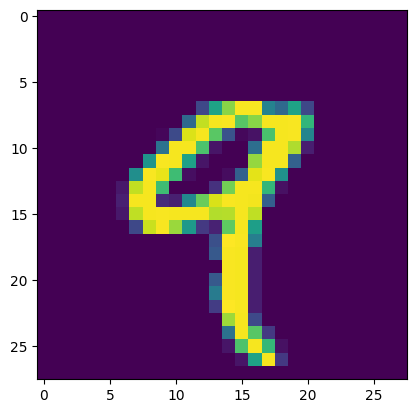

In [75]:
import matplotlib.pyplot as plt
digit = train_images[4]
# plt.imshow(digit, cmap=plt.cm.binary) -> 단정한 효과를 줌
plt.imshow(digit)
plt.show()

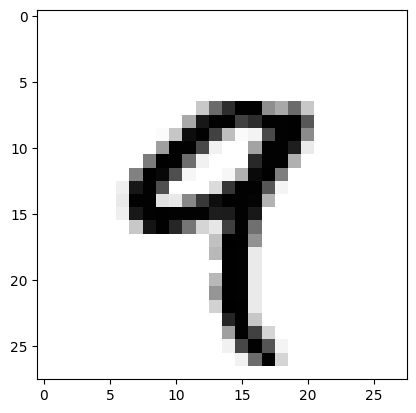

In [76]:
fig, ax  = plt.subplots()
ax.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [77]:
train_labels[4]

9

## NumPy로 텐서 조작하기

In [78]:
my_slice = train_images[10:100] # 90개의 이미지를 가져옴 ,비추
my_slice.shape

(90, 28, 28)

In [79]:
my_slice = train_images[10:100,:,:] # 90개의 이미지를 가져옴
my_slice.shape

(90, 28, 28)

In [80]:
my_slice = train_images[10:100,0:28,0:28] # 90개의 이미지를 가져옴
my_slice.shape

(90, 28, 28)

In [81]:
my_slice = train_images[:,14:,14:] # 오른쪽 아래
my_slice.shape

(60000, 14, 14)

In [82]:
my_slice = train_images[:,7:-7,7:-7] # 오른쪽 아래
my_slice.shape

(60000, 14, 14)

## 배치 데이터
- 딥러닝 모델은 한 번에 저체 데이터셋을 처리하지 않는다!
- 대신 데이터를 작은 배치로 나눔!

In [83]:
batch = train_images[:128] # 이미지 갯수를 나눔

## 텐서 연산

In [84]:
## keras.layers.Dense(512, activation="relu")

In [85]:
# relu 함수 구현
def naive_relu(x): # 2차원 배열
    assert len(x.shape) == 2
    x= x.copy() # 입력 텐서 자체를 바꾸지 않고 복사한다
    for i in range(x.shape[0]):
      for j in range(x.shape[1]):
        x[i,j] = max(x[i,j], 0)
    return x
def naive_add(x,y):
  assert len(x.shape) == 2 # 2차원 배열
  assert x.shape == y.shape
  x= x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

- 원소별 연산

In [86]:
import time
x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = x+y # 각각 원소별 덧셈
  z = np.maximum(z,0.) # 원소별 렐루함수
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [87]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x,y)
  z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 4.08 s


## 브로드캐스팅
- 참고 : https://numpy.org/doc/stable/user/basics.broadcasting.html

In [88]:
import numpy as np
X=np.random.random((32,10)) # X는 크기가 32,10인 행렬
y=np.random.random((10,))# 1차원 벡터

y.shape,y.ndim

((10,), 1)

In [89]:
y = np.expand_dims(y,axis=0) # 2차원 행렬
y.shape,y.ndim

((1, 10), 2)

In [90]:
Y=np.concatenate([y]*32,axis=0)
Y.shape, Y.ndim

((32, 10), 2)

In [91]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [92]:
# p.79
import numpy as np
x= np.random.random((64,3,32,10)) # 4차원
y = np.random.random((32,10)) # 배열다름 2차원'
z=np.maximum(x,y) # 4차원 통합

In [93]:
z.shape, x.shape, x.ndim,

((64, 3, 32, 10), (64, 3, 32, 10), 4)

## 텐서 곱셈

In [94]:
# 행렬 곱셈 np.dot p.79
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x,y)
z

9.394368381635175

- 점곱 연산 함수를 만듬

In [95]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [96]:
naive_vector_dot(x,y)

9.394368381635177

- 행렬과 벡터를 행렬곱 하는 메서드를 만듬

In [97]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

- 기존에 만든 함수를 재용해서 표현

In [98]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [99]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

- 텐서 플로는 행렬곱 연산을 기반으로 한다!

In [100]:
x = np.random.random((32,5))
y = np.random.random((5,32))

naive_matrix_dot(x,y)

array([[0.9087168 , 1.53560829, 0.82479311, ..., 0.53818053, 0.8247006 ,
        0.84033099],
       [1.98394308, 2.45879151, 1.81956069, ..., 1.29484271, 1.88213535,
        1.50357352],
       [1.40011603, 1.39657517, 0.81590203, ..., 1.33183648, 1.33844836,
        1.36304697],
       ...,
       [0.68980799, 1.05549343, 0.74810419, ..., 0.50944536, 0.69449577,
        0.75662571],
       [1.36208647, 1.70395359, 1.23848663, ..., 0.79022096, 1.24585936,
        1.00709928],
       [1.29152099, 0.86693335, 0.88763507, ..., 1.32985689, 1.32549318,
        1.16341458]])

In [101]:
x = np.random.random((64,32))
y = np.random.random((32,16))
z = np.random.random((16,8))

result = naive_matrix_dot(x,y)
naive_matrix_dot(x,y)

array([[ 6.8679701 ,  8.2651829 ,  8.60495924, ...,  6.56845931,
         8.07958118,  6.21605486],
       [ 7.18880315,  7.69274777,  8.50751648, ...,  7.70863876,
         8.70394105,  6.23277976],
       [ 8.59219803,  8.88534724,  9.73514502, ...,  7.39606291,
         9.45388753,  6.70316795],
       ...,
       [ 6.79785287,  7.64495962,  8.06007346, ...,  6.84064928,
         7.68896869,  5.55095159],
       [ 9.35708491,  9.61547361, 11.02901118, ...,  7.97087191,
        10.80900908,  7.48703308],
       [ 8.10104262,  8.80047639,  8.79355529, ...,  8.53122816,
         8.97323007,  6.38928665]])

활성화 함수는 오차를 쉽게 찾게 해주기위해 범위, 사이즈를 맞춰주는 것이다.

## 텐서 크기 변환

In [102]:
train_images = train_images.reshape((60000,28*28))

In [103]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [106]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [107]:
x.reshape(3,2,1,1,1,1,1,1).ndim

8

In [108]:
x = np.zeros((300,20))
x = np.transpose (x)
x.shape # 행과 열을 전치시킨다.

(20, 300)